Fake news prediction





Importing the deoendencies

In [46]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data preprocessing

In [49]:
# Load with basic read
fake_df = pd.read_csv('/content/Fake.csv')
print(fake_df.head())
print(fake_df.columns)



                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [50]:
real_df = pd.read_csv('/content/True.csv', engine='python', on_bad_lines='skip')
print(real_df.head())
print(real_df.columns)


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [51]:
fake_df['label'] = 0  # Fake News
real_df['label'] = 1  # Real News


In [52]:
news_df = pd.concat([fake_df, real_df], axis=0)
news_df = news_df.sample(frac=1).reset_index(drop=True)  # Shuffle

In [53]:
print(news_df.shape)
print(news_df.head())
print(news_df['label'].value_counts())  # Check balance


(46160, 5)
                                               title  \
0   The Westboro Baptist Church Just Crucified Tr...   
1  LATINO TRUMP SUPPORTER: “It was harder to come...   
2  HACKERS REVEAL THOUSANDS OF EMAILS REGISTERED ...   
3  U.S. Commerce Secretary Ross to join economic ...   
4  Trump health nominee says he does not back Med...   

                                                text       subject  \
0  The Westboro Baptist Church doesn t leave much...          News   
1  This guy is great! He describes how it was to ...      politics   
2  This could be bad news for a number of politic...      politics   
3  TOKYO (Reuters) - U.S. Commerce Secretary Wilb...  politicsNews   
4  (Reuters) - President Donald Trump’s nominee t...  politicsNews   

                date  label  
0      March 8, 2016      0  
1        Jun 9, 2016      0  
2       Aug 19, 2015      0  
3    March 30, 2017       1  
4  January 24, 2017       1  
label
0    23481
1    22679
Name: count, dtype: int

In [57]:
#counting number of missing values in dataset
news_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [56]:
news_df.to_csv("cleaned_news_dataset.csv", index=False)

In [63]:
X = news_df['text']     # or df['title'] + ' ' + df['text'] if you want
y = news_df['label']

In [64]:
print(X)
print(Y)

0        The Westboro Baptist Church doesn t leave much...
1        This guy is great! He describes how it was to ...
2        This could be bad news for a number of politic...
3        TOKYO (Reuters) - U.S. Commerce Secretary Wilb...
4        (Reuters) - President Donald Trump’s nominee t...
                               ...                        
46155     All of the tracking polls keep holding at Tru...
46156    TRIPOLI (Reuters) - Libyan authorities are pro...
46157    NEW YORK (Reuters) - Donald Trump was the big ...
46158    No matter which candidate you support, this mo...
46159    How much longer will the citizens of San Juan,...
Name: text, Length: 46160, dtype: object
0        0
1        0
2        0
3        1
4        1
        ..
46155    0
46156    1
46157    1
46158    0
46159    0
Name: label, Length: 46160, dtype: int64


stemming procedure

In [66]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9846187175043327
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4758
           1       0.98      0.99      0.98      4474

    accuracy                           0.98      9232
   macro avg       0.98      0.98      0.98      9232
weighted avg       0.98      0.98      0.98      9232



In [78]:
y_train_pred = model.predict(X_train)
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)
from sklearn.metrics import accuracy_score

# After making predictions
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)


Train Accuracy: 0.9905762564991335


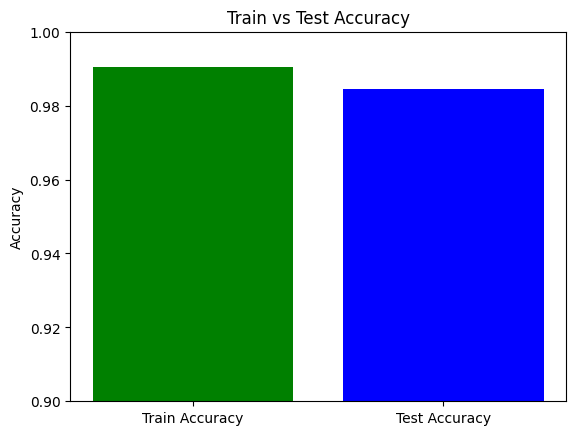

In [79]:
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["green", "blue"])
plt.ylim(0.9, 1.0)
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()